In [1]:
import numpy as np
import pandas as pd


#Plotting and viz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('data/train_ver2.csv')

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_98600/1192977624.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train_ver2.csv')


In [3]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Data Overview

In [3]:
print(f"The Dataset contains {df_train.shape[0]} Recrods and {df_train.shape[1]} columns")

The Dataset contains 13647309 Recrods and 48 columns


In [5]:
print("The datatypes are")
df_train.dtypes

The datatypes are


fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [3]:
missing_value_percentage = df_train.isnull().sum()/len(df_train) * 100
higher_missing_values = missing_value_percentage[missing_value_percentage > 50]
print("The columns which are having more than 50 percent of Null Values : ")
higher_missing_values

The columns which are having more than 50 percent of Null Values : 


ult_fec_cli_1t    99.818330
conyuemp          99.986752
dtype: float64

Total Missing values


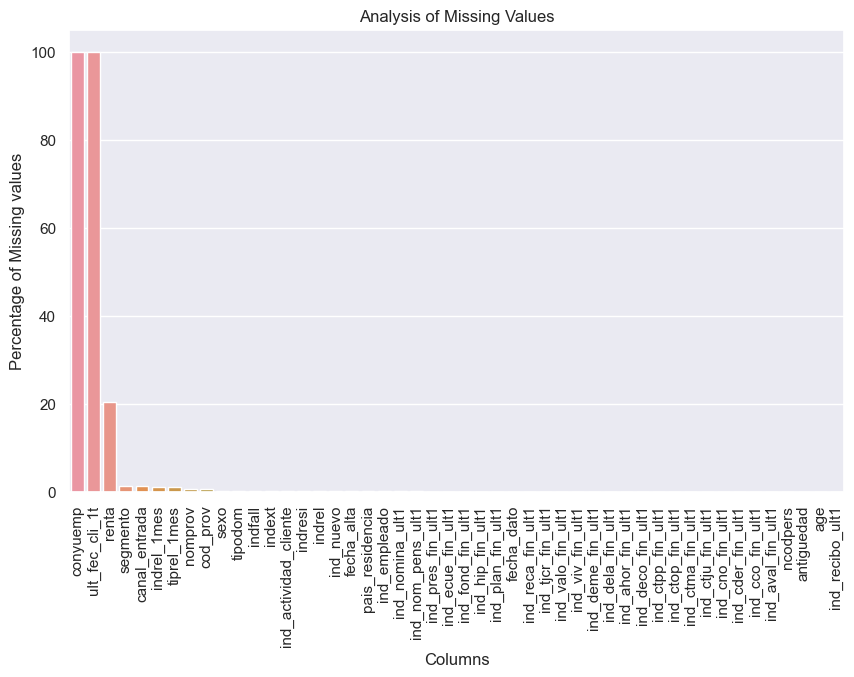

In [7]:
print("Total Missing values")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

missing_value_percentage = missing_value_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_value_percentage.index,y=missing_value_percentage.values)
plt.xticks(rotation = 90)
plt.title("Analysis of Missing Values")
plt.ylabel("Percentage of Missing values")
plt.xlabel("Columns")
plt.show()

In [21]:
#Drop those columns which are almost entirely null
cols_to_drop = ['ult_fec_cli_1t','conyuemp']
df_train.drop(columns = cols_to_drop,inplace=True)

print("After Removing the columns")
df_train.info()

After Removing the columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13631246 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            object 
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  tipodom                float64
 17  cod_prov               float64
 18  nomprov                object 
 19  ind_actividad_cliente  float64
 20  renta                  float64
 21  segmento               ob

In [11]:
def compute_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values.sort_values(ascending=False)

    return missing_values

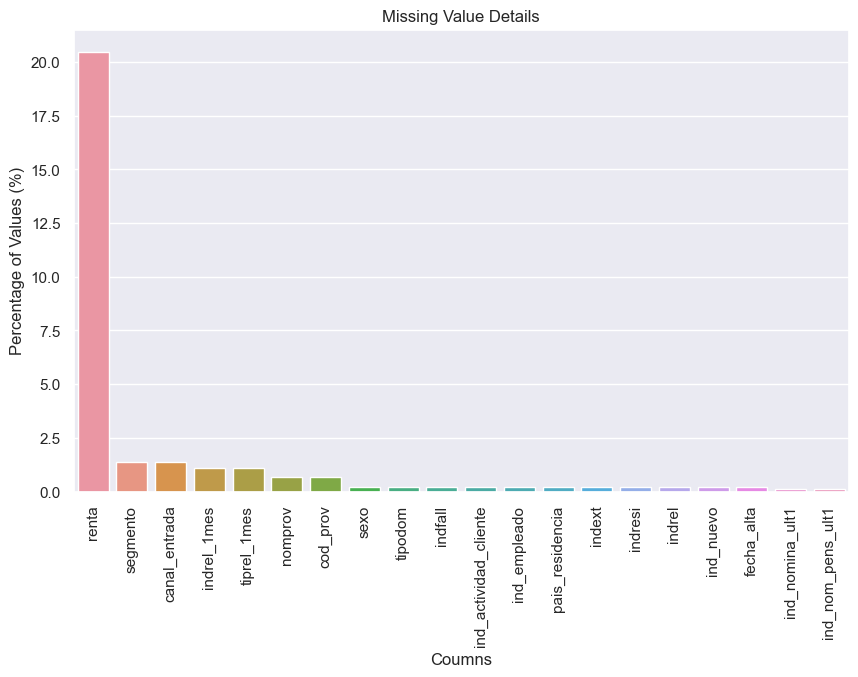

renta                    20.475648
segmento                  1.387585
canal_entrada             1.363829
indrel_1mes               1.097513
tiprel_1mes               1.097513
nomprov                   0.685784
cod_prov                  0.685784
sexo                      0.203732
tipodom                   0.203227
indfall                   0.203220
ind_actividad_cliente     0.203220
ind_empleado              0.203220
pais_residencia           0.203220
indext                    0.203220
indresi                   0.203220
indrel                    0.203220
ind_nuevo                 0.203220
fecha_alta                0.203220
ind_nomina_ult1           0.117701
ind_nom_pens_ult1         0.117701
dtype: float64


In [31]:
missing_value_percentage = df_train.isnull().sum()/len(df_train) * 100

missing_value_percentage = missing_value_percentage[missing_value_percentage > 0]
missing_value_percentage = missing_value_percentage.sort_values(ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x=missing_value_percentage.index,y=missing_value_percentage.values)
plt.xticks(rotation = 90)
plt.title("Missing Value Details")
plt.ylabel("Percentage of Values (%)")
plt.xlabel("Coumns")
plt.show()

print(missing_value_percentage.T)

In [4]:
#Age column is of type object, converting it to numeric
df_train['age'] = df_train['age'].replace(' NA', np.nan) # Replace ' NA' strings with NaN

#As we did not consider this while analysing missing values
print(df_train['age'].isnull().sum())

#Converting Age to float for further analysis
df_train['age'] = df_train['age'].astype(float)

27734


In [6]:
#Number of unique customer is the Dataset
df_train['ncodpers'].nunique()

956645

In [5]:
#Numerical Analysis of the columns
product_columns = [col for col in df_train.columns if col.endswith('ult1')] #Removing the product columns since values are 0 or 1
df_train_subset = df_train.drop(columns = product_columns,axis=1)

In [6]:
df_train_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
ncodpers,13647309.0,834904.211501,431565.025784,15889.00,452813.00,931893.0,1199286.00,1553689.00
age,13619575.0,40.181465,17.185087,2.00,24.00,39.0,50.00,164.00
ind_nuevo,13619575.0,0.059562,0.236673,0.00,0.00,0.0,0.00,1.00
indrel,13619575.0,1.178399,4.177469,1.00,1.00,1.0,1.00,99.00
tipodom,13619574.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00
cod_prov,13553718.0,26.571470,12.784017,1.00,15.00,28.0,35.00,52.00
ind_actividad_cliente,13619575.0,0.457811,0.498217,0.00,0.00,0.0,1.00,1.00
renta,10852934.0,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51


In [9]:
numerical_columns = df_train_subset.select_dtypes(include=np.number).columns
print(numerical_columns)

Index(['ncodpers', 'age', 'ind_nuevo', 'indrel', 'tipodom', 'cod_prov',
       'ind_actividad_cliente', 'renta'],
      dtype='object')


### Data Imputing

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            object 
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  tipodom                float64
 17  cod_prov               float64
 18  nomprov                object 
 19  ind_actividad_cliente  float64
 20  renta                  float64
 21  segmento               object 
 22  ind_ahor_fin_ult

In [7]:
df_train['segmento'] = df_train['segmento'].fillna(df_train['segmento'].mode()[0])
df_train['segmento'].isnull().sum()

0

In [8]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}
df_vip_customer_list = df_train[df_train['segmento'] == '01 - TOP']


In [9]:
df_regular_customer_list = df_train[df_train['segmento']=='02 - PARTICULARES']
df_student_customer_list =df_train[df_train['segmento']=='03 - UNIVERSITARIO']

In [12]:
print(f"Total Records in VIP List : {df_vip_customer_list.shape[0]}")
missing_vip_values = compute_missing_values(df_vip_customer_list)
missing_vip_values

Total Records in VIP List : 562142


conyuemp             561504
ult_fec_cli_1t       561243
renta                 82367
cod_prov               3741
nomprov                3741
canal_entrada            16
ind_nomina_ult1           5
ind_nom_pens_ult1         5
dtype: int64

In [13]:
print(f"Total Records in Regular Customer List : {df_regular_customer_list.shape[0]}")
missing_regular_values = compute_missing_values(df_regular_customer_list)
missing_regular_values

Total Records in Regular Customer List : 8149588


conyuemp                 8148418
ult_fec_cli_1t           8131696
renta                    1569877
canal_entrada             185970
indrel_1mes               149772
tiprel_1mes               149772
nomprov                    85098
cod_prov                   85098
sexo                       27804
tipodom                    27735
ind_empleado               27734
ind_actividad_cliente      27734
indfall                    27734
indext                     27734
pais_residencia            27734
indresi                    27734
indrel                     27734
ind_nuevo                  27734
fecha_alta                 27734
age                        27734
ind_nomina_ult1            16042
ind_nom_pens_ult1          16042
dtype: int64

In [14]:
print(f"Total Records in Student Customer List: {df_student_customer_list.shape[0]}")
missing_student_values = compute_missing_values(df_student_customer_list)
missing_student_values

Total Records in Student Customer List: 4935579


conyuemp             4935579
ult_fec_cli_1t       4929577
renta                1142131
cod_prov                4752
nomprov                 4752
canal_entrada            140
ind_nomina_ult1           16
ind_nom_pens_ult1         16
indrel_1mes                9
tiprel_1mes                9
dtype: int64

### Methods to deal with the Null Values

**Option 1:**

Remove the records

- columns like `ind_nomina_ult1 - 0.117701` & `ind_nom_pens_ult1 - 0.117701` have only very less number of null values. If we remove those records, we are removing around 15,012 rows (approximately from the total `df_train` dataset). Comparing the size of the entire dataset, it does not make a huge difference, So we can remove these records.


 

#### Dealing Null Values in `Income`

In [15]:
df_train.dropna(subset=['ind_nomina_ult1','ind_nom_pens_ult1'],inplace = True)

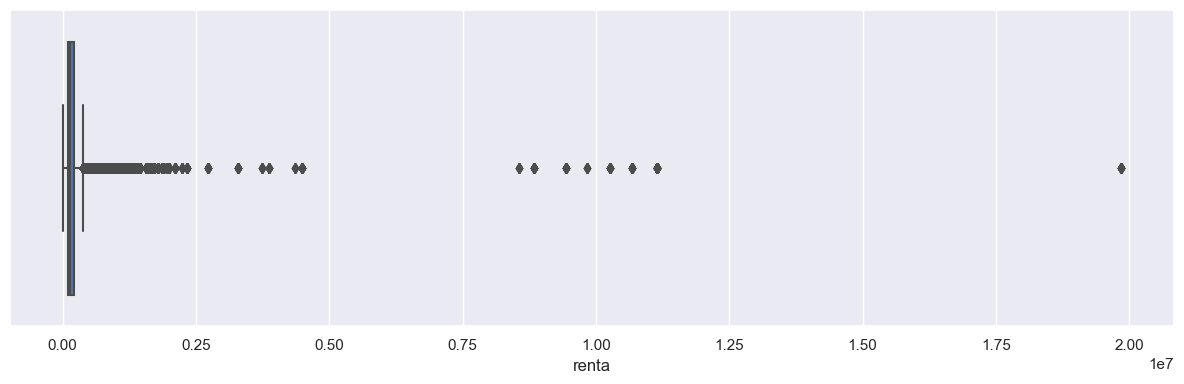

The minumum Annua income in VIP group : 3796.86
The maximum Annual income in VIP group : 19849331.97
The Median annual income of the group : 141562.68
Average VIP customers annual income : 175853.0885455057


In [42]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_vip_customer_list['renta'])
plt.tight_layout()
plt.show()

print(f"The minumum Annua income in VIP group : {df_vip_customer_list['renta'].min()}")
print(f"The maximum Annual income in VIP group : {df_vip_customer_list['renta'].max()}")
print(f"The Median annual income of the group : {df_vip_customer_list['renta'].median()}")
print(f"Average VIP customers annual income : {df_vip_customer_list['renta'].mean()}")

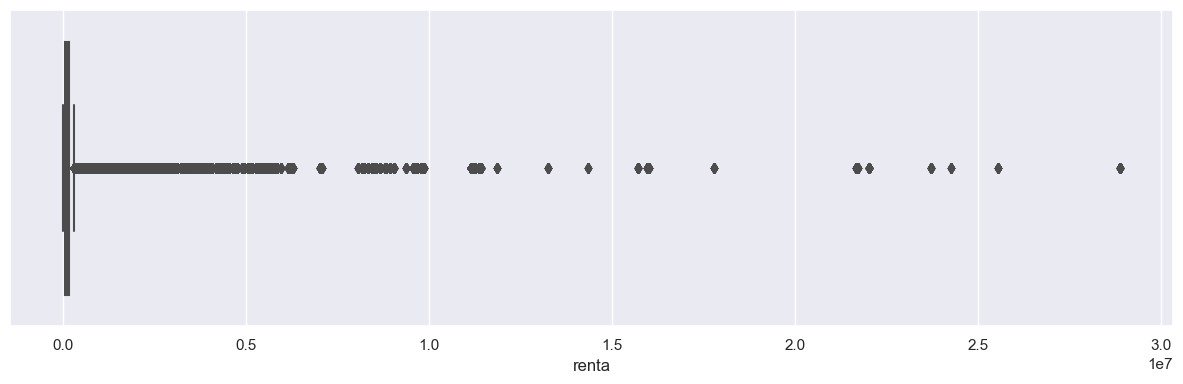

The minumum Annual income in Regular group : 1471.23
The maximum Annual income in Regular group : 28894395.51
The median annual income of the group : 108013.65
Average Regualar customers annual income : 141558.18551324584


In [43]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_regular_customer_list['renta'])
plt.tight_layout()
plt.show()


print(f"The minumum Annual income in Regular group : {df_regular_customer_list['renta'].min()}")
print(f"The maximum Annual income in Regular group : {df_regular_customer_list['renta'].max()}")
print(f"The median annual income of the group : {df_regular_customer_list['renta'].median()}")
print(f"Average Regualar customers annual income : {df_regular_customer_list['renta'].mean()}")

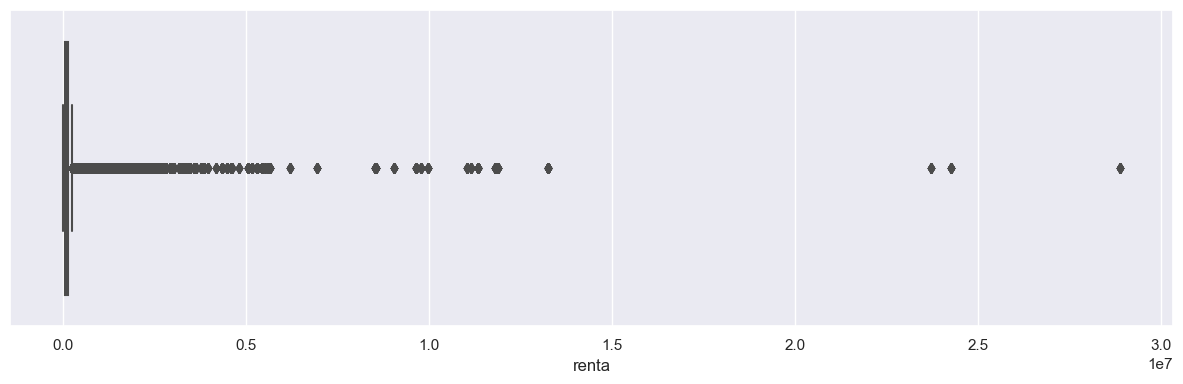

The minumum Annual income in students group : 1202.73
The maximum Annual income in students group : 28894395.51
The Median annual income of the group : 88740.27
Average students customers annual income : 116431.55839100214


In [47]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_student_customer_list['renta'])
plt.tight_layout()
plt.show()


print(f"The minumum Annual income in students group : {df_student_customer_list['renta'].min()}")
print(f"The maximum Annual income in students group : {df_student_customer_list['renta'].max()}")
print(f"The Median annual income of the group : {df_student_customer_list['renta'].median()}")
print(f"Average students customers annual income : {df_student_customer_list['renta'].mean()}")


Since the `renta` (Annual Income) has large outliers and skewness, I'm using median to impute the missing values in each segments. 

In [16]:
df_train['renta']=df_train['renta'].fillna(
    df_train.groupby('segmento')['renta'].transform('median')
)

In [17]:
df_train['renta'].isnull().sum()

0

#### Dealing Null Values in `Age` and `Sex`

In [18]:
#Sex and Age are only missing in Regular Customers 
#We'll impute sex with mode(as it is categorical) and age with median(as the data is skewed)
df_train['sexo'] = df_train['sexo'].fillna(
    df_train.groupby('segmento')['sexo'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)
df_train['sexo'].isnull().sum()

0

In [19]:
#Age
df_train['age']=df_train['age'].fillna(
    df_train.groupby('segmento')['age'].transform('median')
)
df_train.age.isnull().sum()

0

In [22]:
missing_values_test = compute_missing_values(df_train)
missing_values_test

canal_entrada            170215
indrel_1mes              133935
tiprel_1mes              133935
cod_prov                  77745
nomprov                   77745
tipodom                   11889
ind_empleado              11888
pais_residencia           11888
fecha_alta                11888
ind_nuevo                 11888
indrel                    11888
indresi                   11888
indext                    11888
indfall                   11888
ind_actividad_cliente     11888
dtype: int64

In [23]:
df_train.dropna(subset=['ind_empleado','tipodom'],inplace = True)

#### The missing values in `canal_entrada` is filled with unknown as there were a lot of records and mode imputing didn't feel like a good technique

In [24]:
df_train['canal_entrada']=df_train['canal_entrada'].fillna('Unknown')
df_train['canal_entrada'].isnull().sum()

0

#### Assumption and Logic in imputing `indrel_1mes` and `tiprel_1mes`

- If the customer is a student (segmento == '03 - UNIVERSITARIO') or has 0 months of seniority (antiguedad == 0), they are likely new or not yet active, so we impute 'P' (Potential).

- Otherwise, the default most common relationship is '1' (Primary), so we impute '1'.

**Assumption**: Students and new customers are more likely to be potential users, while others can be safely treated as standard active customers.

- If their indrel_1mes is 'P' (Potential), it makes sense to set their relationship type as 'R' (Potential).

- For everyone else, assume 'A' (Active) unless evidence suggests otherwise.

**Assumption**: If someone is a potential customer, their relationship with the bank is also potential ('R'). For others, active status is a safe assumption.

In [32]:
df_train['indrel_1mes'].unique()

array([1.0, 3.0, 2.0, nan, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [33]:
# Convert all values to string
df_train['indrel_1mes'] = df_train['indrel_1mes'].astype(str)

# Strip any trailing .0 (e.g., '3.0' -> '3') and whitespace
df_train['indrel_1mes'] = df_train['indrel_1mes'].str.strip().str.replace(r'\.0$', '', regex=True)

# Replace 'nan' string with actual NaN
df_train['indrel_1mes'] = df_train['indrel_1mes'].replace('nan', np.nan)

# View cleaned unique values
print(df_train['indrel_1mes'].unique())

['1' '3' '2' nan '4' 'P']


In [39]:
# Create mask where the condition is True
mask = (df_train['indrel_1mes'].isna()) & (
    (df_train['segmento'] == '03 - UNIVERSITARIO') | (df_train['antiguedad'] == 0)
)

# Fill only those positions with 'P', rest with '1'
df_train.loc[mask, 'indrel_1mes'] = 'P'
df_train['indrel_1mes'].fillna('1', inplace=True)

print(df_train['indrel_1mes'].isnull().sum())

0


In [44]:
df_train['tiprel_1mes'].unique()

array(['A', 'I', 'P', nan, 'R', 'N'], dtype=object)

In [40]:
df_train['tiprel_1mes'] = df_train['tiprel_1mes'].fillna(
    df_train['indrel_1mes'].apply(lambda x: 'R' if x == 'P' else 'A')
)
df_train['tiprel_1mes'].isnull().sum()

0

#### Missing Values in `cod_prov` and `nom_prov`

In [41]:
missing_set = compute_missing_values(df_train)
missing_set

cod_prov    65856
nomprov     65856
dtype: int64

In [ ]:
df_train['cod_prov'].fillna(df_train['cod_prov'].mode()[0],inplace=True)
df_train['nomprov'].fillna(df_train['nomprov'].mode()[0],inplace=True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 13619357 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            object 
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  tipodom                float64
 17  cod_prov               float64
 18  nomprov                object 
 19  ind_actividad_cliente  float64
 20  renta                  float64
 21  segmento               object 
 22  ind_ahor_fin_ult

In [43]:
df_train.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

In [44]:
print(f"After Cleaning the dataset, there are {df_train.shape[0]} records and {df_train.shape[1]} columns")

After Cleaning the dataset, there are 13619357 records and 46 columns


In [46]:
df_train.to_csv('data/cleaned_santander_data.csv', index=False)
print("Cleaned data saved to data folder")

Cleaned data saved to data folder


## Customer Demographics & Behavior Analysis

### **Customer Segmentation**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.ticker as ticker
import plotly.express as px

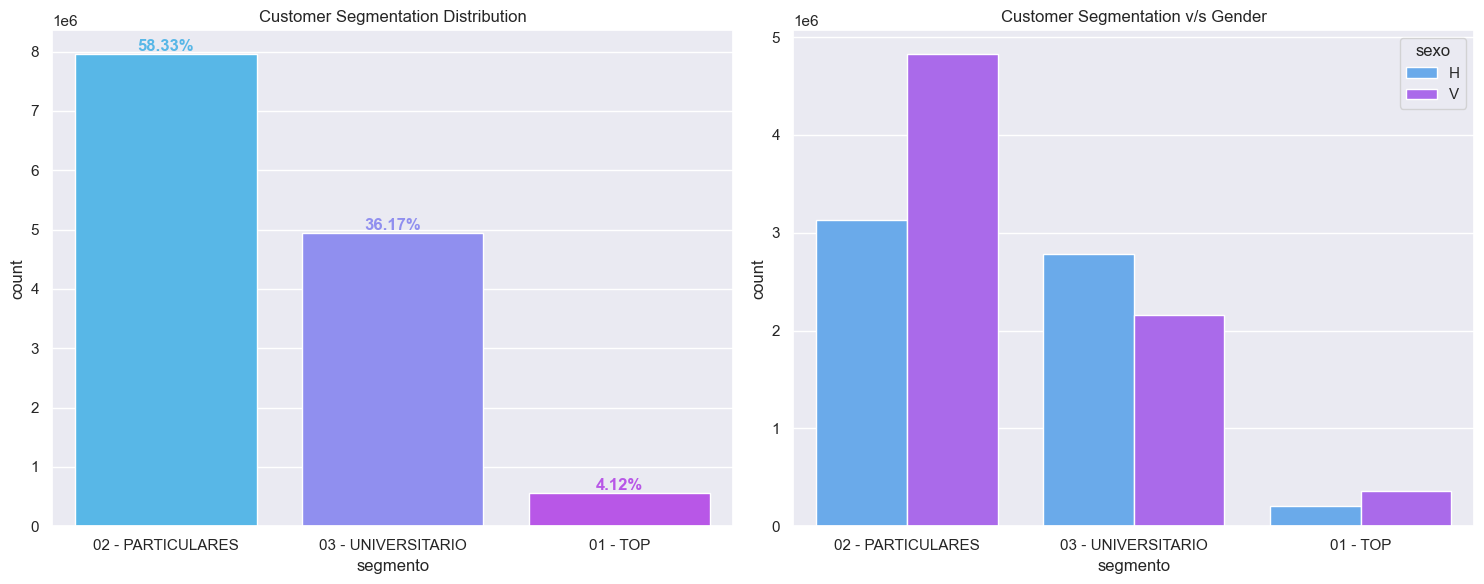

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
palette = sns.color_palette("cool", n_colors=3)


sns.countplot(x=df_train['segmento'],ax = ax[0],palette=palette)
total = len(df_train)
for bar in ax[0].patches:
    height = bar.get_height()
    percentage = f"{(height / total) * 100:.2f}%"
    ax[0].annotate(
        percentage,
        (bar.get_x() + bar.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontweight='bold',
        color=bar.get_facecolor()
    )

ax[0].set_title("Customer Segmentation Distribution")
    
sns.countplot(x=df_train['segmento'],hue=df_train['sexo'],palette='cool',ax=ax[1])
ax[1].set_title('Customer Segmentation v/s Gender')
plt.tight_layout()
plt.show()

The majority of the bank's customers fall into the "Particulares" **(regular individuals) segment, accounting for 58.33%** of the total base. Student customers **("Universitario") form a significant portion as well, at 36.17%.** Only **4.12% belong to the "TOP" premium segment**, indicating a smaller high-net-worth customer base with potentially higher lifetime value.

In terms of gender distribution, 
- **women slightly outnumber men in both the regular and premium segments**, suggesting **strong female engagement with core banking services.** 
- However, in the **student segment, male customers dominate,** highlighting a potential gap in engagement among female students. 
- This suggests an opportunity for the bank to tailor products and outreach for women in early financial stages, and to expand offerings that appeal to the underrepresented groups in each segment.

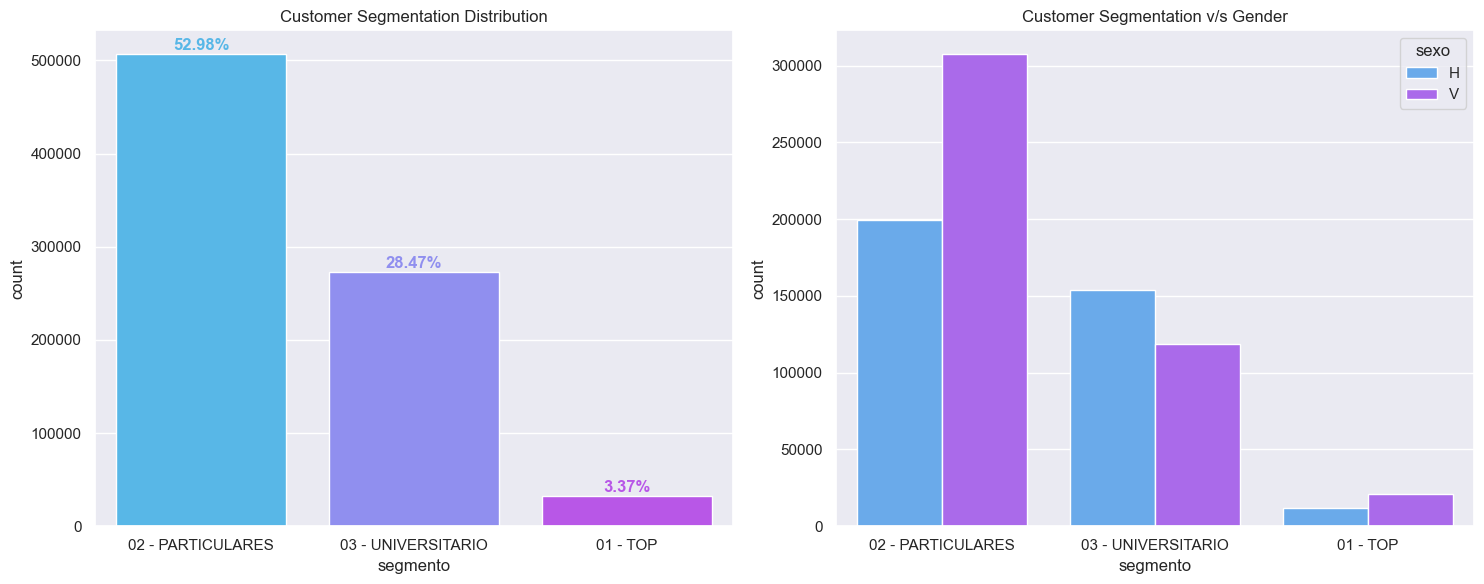

(956645, 46)


In [4]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
palette = sns.color_palette("cool", n_colors=3)

df_train_copy = df_train.drop_duplicates(subset='ncodpers')
sns.countplot(x=df_train_copy['segmento'],ax = ax[0],palette=palette)
total = len(df_train_copy)
for bar in ax[0].patches:
    height = bar.get_height()
    percentage = f"{(height / total) * 100:.2f}%"
    ax[0].annotate(
        percentage,
        (bar.get_x() + bar.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontweight='bold',
        color=bar.get_facecolor()
    )

ax[0].set_title("Customer Segmentation Distribution")
    
sns.countplot(x=df_train_copy['segmento'],hue=df_train_copy['sexo'],palette='cool',ax=ax[1])
ax[1].set_title('Customer Segmentation v/s Gender')
plt.tight_layout()
plt.show()
print(df_train_copy.shape)

### **Age, Gender, Segmento**

27734

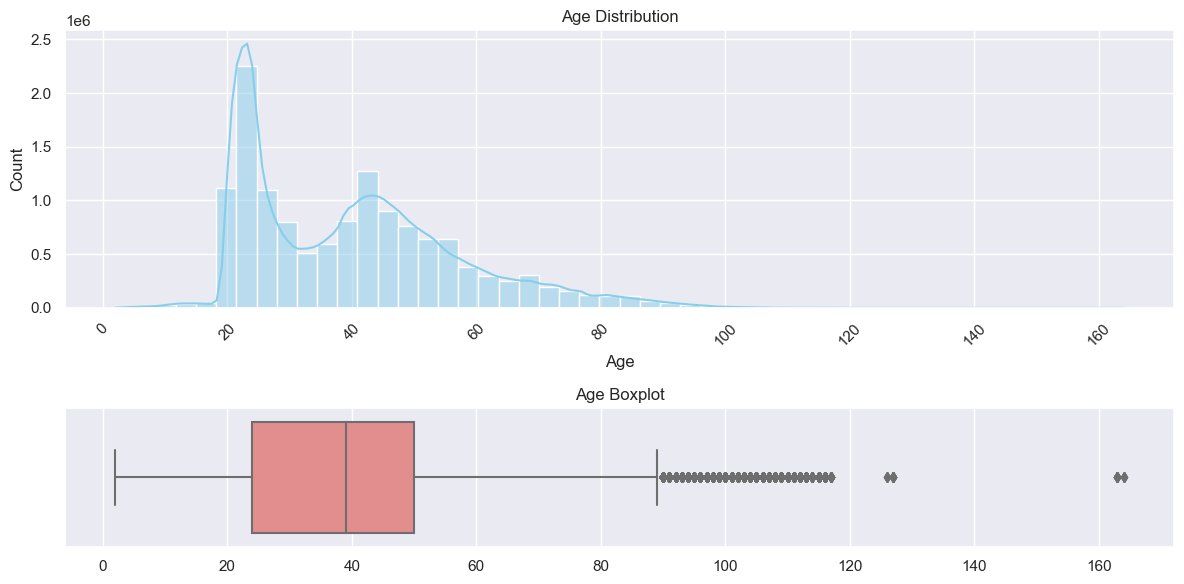

In [33]:
age_data = df_train['age']
median_age = df_train['age'].median()
age_data = age_data.fillna(median_age)
fig, axes = plt.subplots(2, 1, figsize=(12, 6),gridspec_kw={'height_ratios': [2, 1]})

sns.histplot(age_data, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x=age_data, ax=axes[1], color='lightcoral')
axes[1].set(xlabel=None)
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()


**Age Distribution (Top Plot)**

The histogram shows that the majority of customers are between 20 and 50 years old, with a noticeable spike around age 23. This spike could be due to a large group of young adults, possibly student accounts or individuals who recently entered the workforce.

There is a gradual decline in the number of customers as age increases beyond 50, which is expected in a general banking population. However, there are outliers on the far right — individuals listed as over 100 years old, and even beyond 120 and 160. These are likely data entry errors and should be reviewed during data cleaning.

**Boxplot (Bottom Plot)**
- The boxplot confirms the insights from the histogram:

- The median age lies around the mid-30s.

- The interquartile range (IQR) spans from about age 23 to age 53.

- Numerous data points beyond 90 are considered statistical outliers.

- Extreme values above 120, like 130 or 160, are almost certainly incorrect and should be excluded from analysis.

In [41]:
age_greaterThan_100 = df_train[df_train['age'] > 100]
print(f"Total Values above 100 {age_greaterThan_100 ['age'].count()}")
age_greaterThan_100['age'].value_counts()

Total Values above 100 12869


101.0    2666
102.0    2335
103.0    2003
104.0    1350
105.0    1280
106.0     899
107.0     594
108.0     456
109.0     265
110.0     261
111.0     252
112.0     188
113.0     117
115.0      82
116.0      63
114.0      22
117.0      14
163.0       8
127.0       8
126.0       3
164.0       3
Name: age, dtype: int64

In [7]:
df_train['age'].median()

39.0

In [8]:
df_train['age'].mean()

40.18146491355274

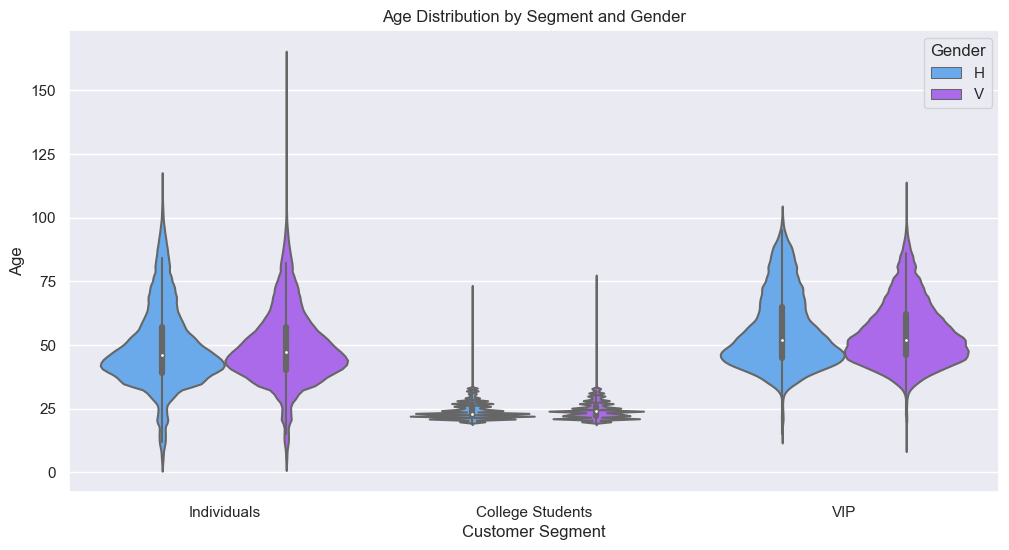

In [9]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}

#df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')
df_viz = df_train.dropna(subset=['age', 'segmento', 'sexo']).copy()
df_viz.loc[:, 'segmento'] = df_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='age', hue='sexo', data=df_viz, inner='box', palette='cool')
plt.title('Age Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

In [46]:
print(df_viz.shape)
print(df_train.shape)

(13457872, 46)
(13647309, 46)


This violin plot shows the age distribution of bank customers across three different customer segments — **Individuals, College Students, and VIPs** — and also compares how age varies between males (H) and females (V) within each group.

- College Students are mostly aged between 18 and 30, with a sharp concentration around the early 20s.

- Individuals and VIPs have a much wider age range, stretching from 20s to 90s and even beyond 100 in some cases.

- The distributions are fairly similar between genders, although females (V) in the Individual and VIP groups show a slightly broader spread in older ages.



### **Income distribution**

In [12]:
df_train['renta'].describe()

count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64

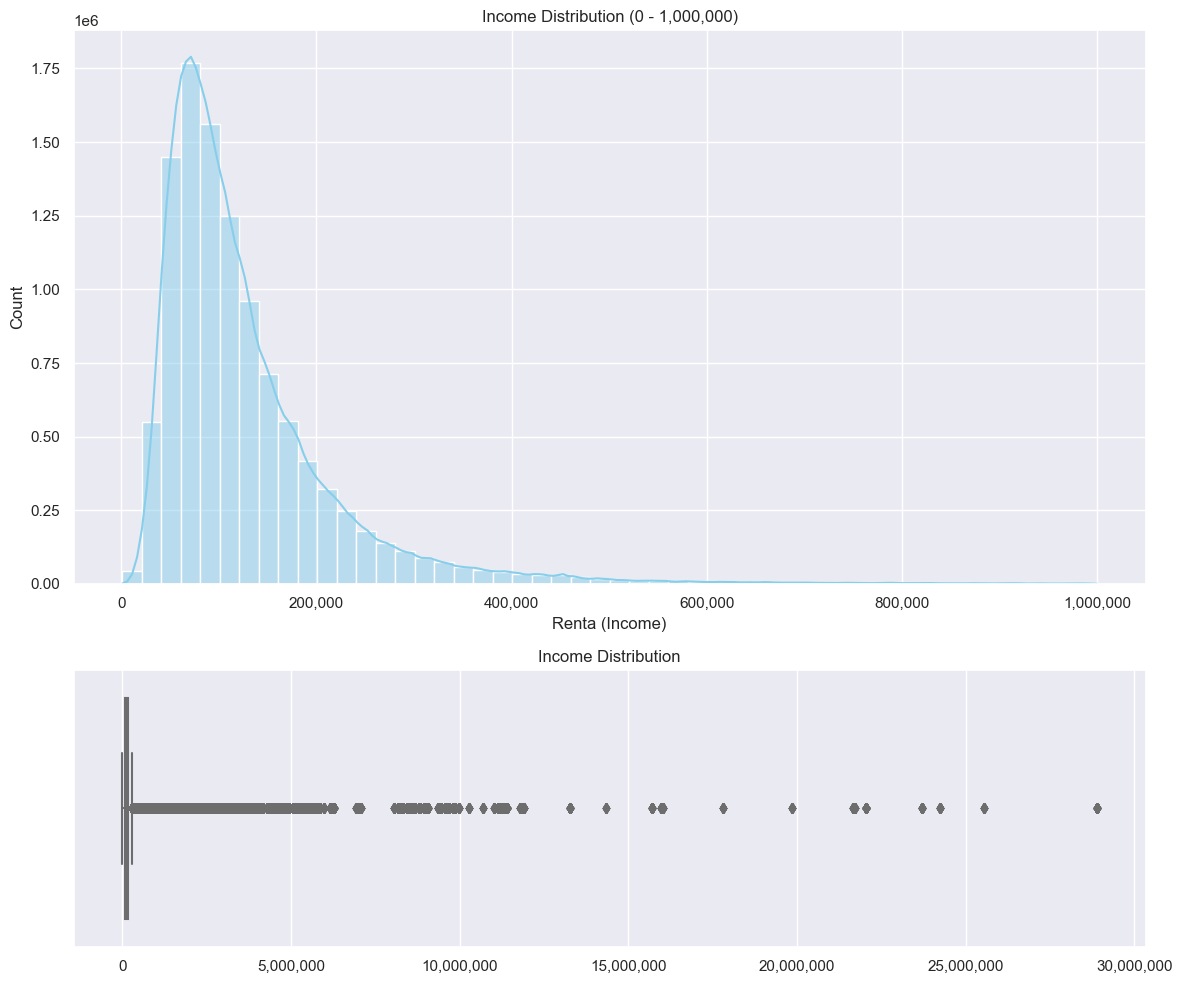

In [ ]:


df_train['renta'] = pd.to_numeric(df_train['renta'], errors='coerce')
df_renta = df_train['renta'].dropna()
df_renta_clean = df_renta[(df_renta > 0) & (df_renta < 1_000_000)]

fig, ax = plt.subplots(2,1, figsize=(12,10),gridspec_kw={'height_ratios':[2,1]})

sns.histplot(df_renta_clean, bins=50, kde=True, color='skyblue',ax = ax[0])
ax[0].set_title('Income Distribution (0 - 1,000,000)')
ax[0].set_xlabel('Renta (Income)')
ax[0].set_ylabel('Count')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.boxplot(x=df_renta, ax = ax[1],color = 'salmon')
ax[1].set_title('Income Distribution')
ax[1].set(xlabel = None)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


The customer base is primarily low to middle income; this is valuable for targeting general banking products like savings, loans, and credit cards.

The long right tail includes high-income individuals — although few in number, they are likely eligible for premium financial services (wealth management, investments).

The wide presence of outliers indicates a need to either:

- Use log transformation or robust scaling for modeling tasks

- Or perform separate analysis for general and high-income groups

Marketing, segmentation, and model building should consider this skewed nature to avoid bias toward outliers.

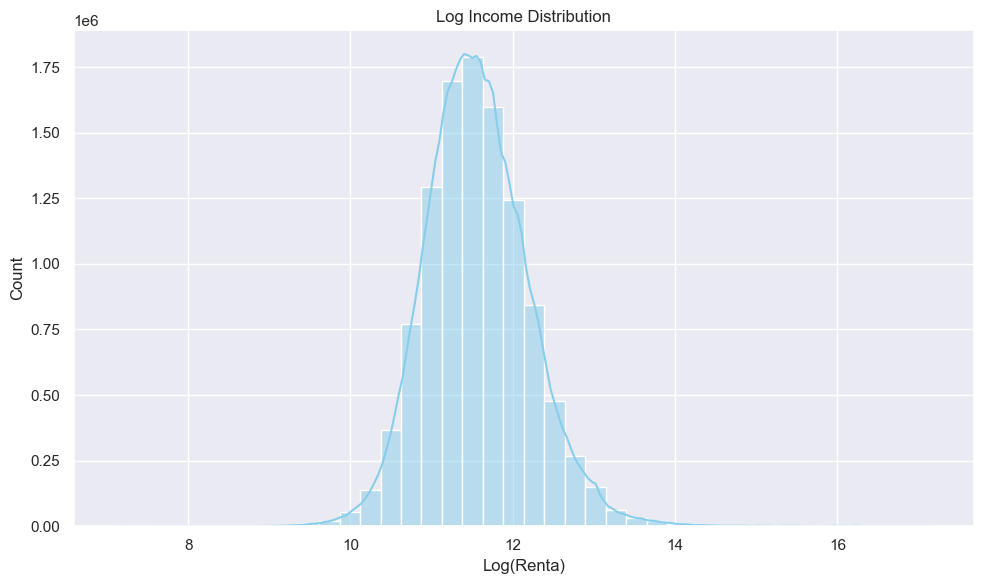

In [6]:
import numpy as np
df_renta_log = np.log1p(df_renta[df_renta > 0])

plt.figure(figsize=(10,6))
sns.histplot(df_renta_log, bins=40, kde=True, color='skyblue')
plt.title('Log Income Distribution')
plt.xlabel('Log(Renta)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


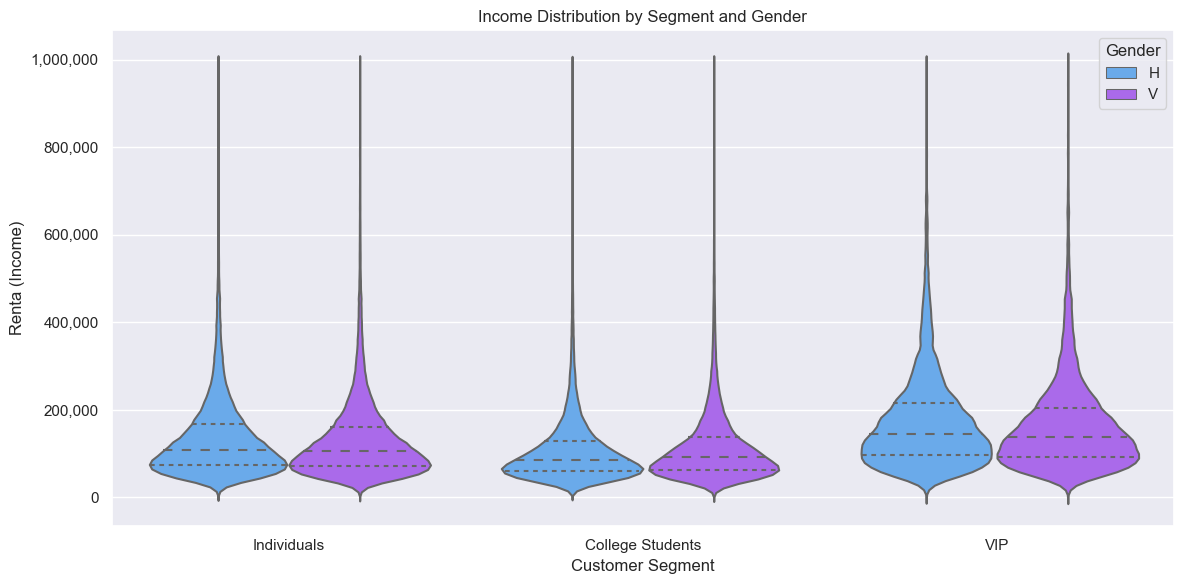

In [7]:
# Clean renta and filter out invalid/huge values
df_income_viz = df_train.dropna(subset=['renta', 'segmento', 'sexo']).copy()
df_income_viz = df_income_viz[df_income_viz['renta'] <= 1_000_000]  # cap extreme outliers

# Plot
df_income_viz.loc[:, 'segmento'] = df_income_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='renta', hue='sexo', data=df_income_viz, inner='quartile', palette='cool')
plt.title('Income Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


This chart shows how income is distributed across different customer segments and genders:

- Individuals and VIPs tend to have higher incomes compared to College Students.

- Across all segments, both males (H) and females (V) show similar income distributions.

- VIP customers have a broader spread in income, indicating the presence of high-income clients.

- College students generally fall in a lower income bracket with very little variation.

This helps us identify income disparities by customer type and ensure targeted financial products are aligned accordingly.

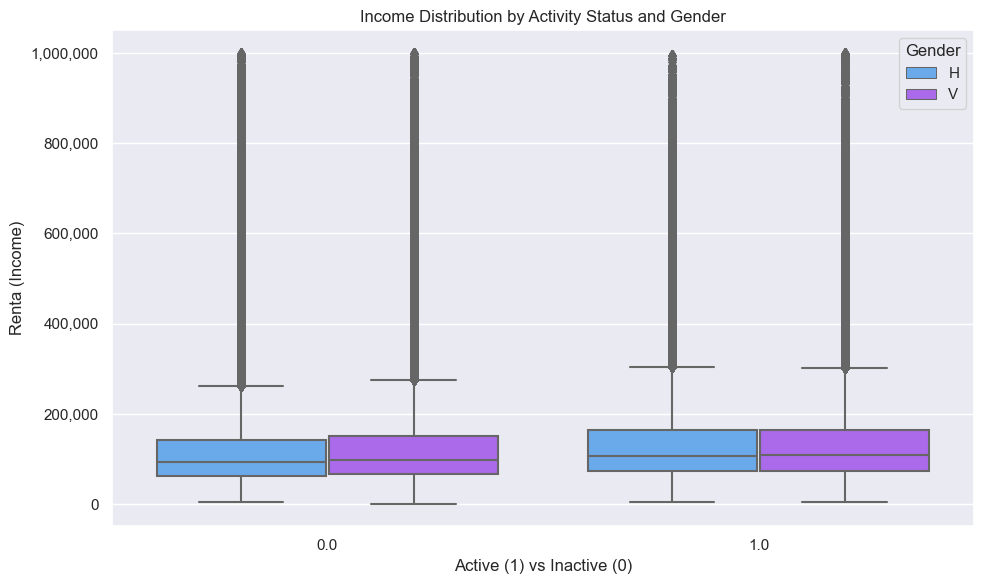

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ind_actividad_cliente', y='renta', hue='sexo', data=df_income_viz, palette='cool')
plt.title('Income Distribution by Activity Status and Gender')
plt.xlabel('Active (1) vs Inactive (0)')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


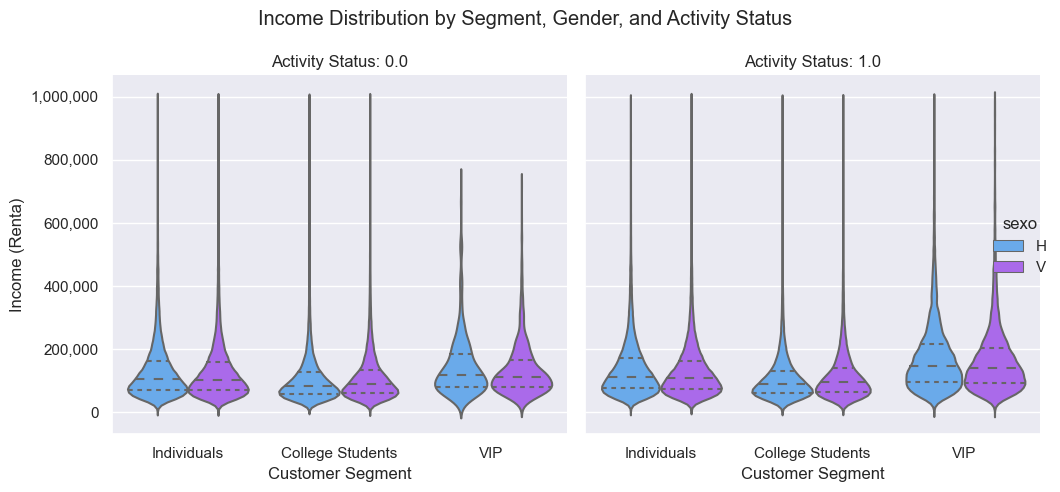

In [9]:
g = sns.catplot(
    data=df_income_viz,
    x='segmento', y='renta', hue='sexo',
    col='ind_actividad_cliente',
    kind='violin',
    palette='cool', inner='quartile'
)

g.set_titles("Activity Status: {col_name}")
g.set_axis_labels("Customer Segment", "Income (Renta)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Income Distribution by Segment, Gender, and Activity Status")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


This chart compares the income distribution of different customer segments based on gender and their activity status (active vs inactive).

- VIPs consistently have the highest income, regardless of activity status.

- College Students have the lowest income, showing a narrow and lower range across the board.

- Females (V) and Males (H) show similar income distributions within each group.

- Active customers (Activity Status: 1.0) tend to have slightly higher median incomes and more uniform distributions compared to inactive ones.

This suggests income is a relevant factor in customer engagement. Higher-income individuals are more likely to remain active.

### **Segment-wise product ownership patterns**

In [10]:
#Product Labels Mapped from Kaggle Documentation of Data
product_labels = {
    'ind_ahor_fin_ult1': 'Saving Account',
    'ind_aval_fin_ult1': 'Guarantees',
    'ind_cco_fin_ult1': 'Current Accounts',
    'ind_cder_fin_ult1': 'Derivada Account',
    'ind_cno_fin_ult1': 'Payroll Account',
    'ind_ctju_fin_ult1': 'Junior Account',
    'ind_ctma_fin_ult1': 'Más particular Account',
    'ind_ctop_fin_ult1': 'Particular Account',
    'ind_ctpp_fin_ult1': 'Particular Plus Account',
    'ind_deco_fin_ult1': 'Short-term Deposits',
    'ind_deme_fin_ult1': 'Medium-term Deposits',
    'ind_dela_fin_ult1': 'Long-term Deposits',
    'ind_ecue_fin_ult1': 'e-Account',
    'ind_fond_fin_ult1': 'Funds',
    'ind_hip_fin_ult1': 'Mortgage',
    'ind_plan_fin_ult1': 'Pensions',
    'ind_pres_fin_ult1': 'Loans',
    'ind_reca_fin_ult1': 'Taxes',
    'ind_tjcr_fin_ult1': 'Credit Card',
    'ind_valo_fin_ult1': 'Securities',
    'ind_viv_fin_ult1': 'Home Account',
    'ind_nomina_ult1': 'Payroll',
    'ind_nom_pens_ult1': 'Pension Income',
    'ind_recibo_ult1': 'Direct Debit'
}


In [5]:
# Which products are most/least popular overall
ult1_columns = [col for col in df_train.columns if col.endswith('ult1')]

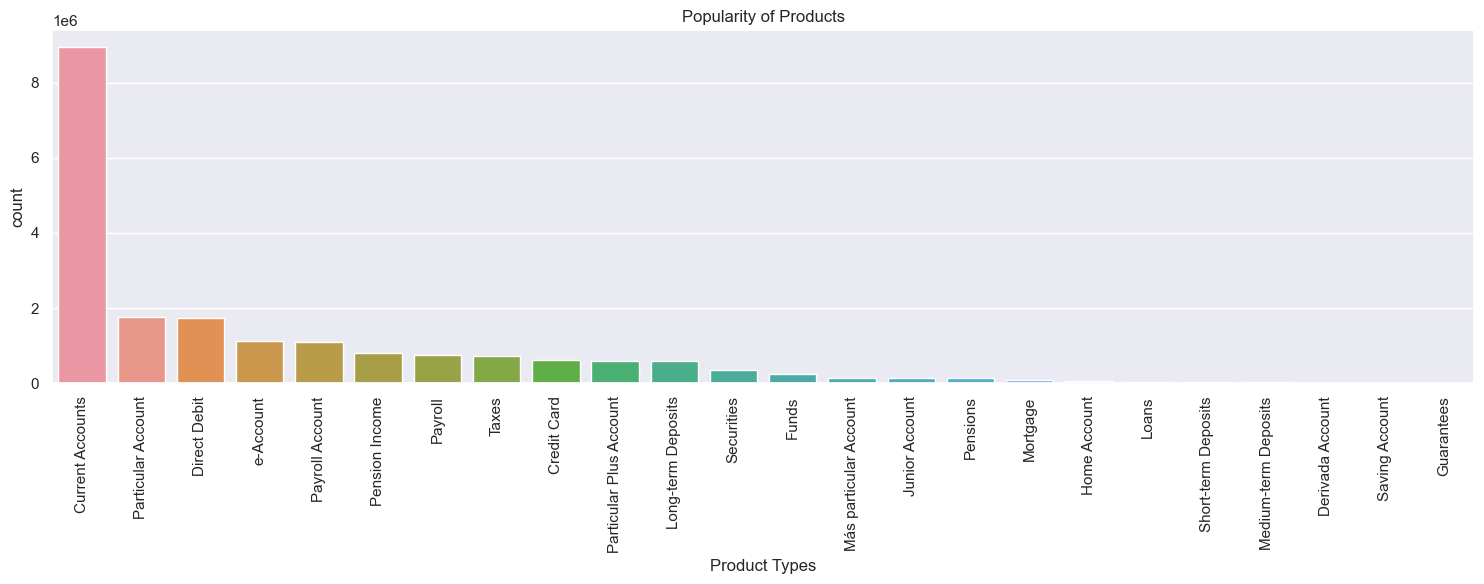

In [ ]:
product_count = {}
for col in ult1_columns:
    sum_of_values = df_train[col].sum()
    product_count[col] = sum_of_values

product_df = pd.DataFrame(
    list(product_count.items()), 
    columns=['product', 'count']
)

product_df['product_name'] = product_df['product'].map(product_labels)
product_df.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=(15,6))
sns.barplot(x=product_df['product_name'], y = product_df['count'])
plt.title("Popularity of Products")
plt.xlabel("Product Types")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [12]:
import plotly.express as px

df_product_segment_relation = df_train.groupby('segmento')[ult1_columns].sum()

df_melted = df_product_segment_relation.reset_index().melt(
    id_vars='segmento',
    var_name='product',
    value_name='ownership_rate'
)
df_melted['product_name'] = df_melted['product'].map(product_labels)

px.bar(df_melted, x='product_name',
       y = 'ownership_rate',
       color='segmento',
       title='Customer Segment w.r.t products owned',
       labels={
        "segmento": "Segment",
        "product_name" : "Product Name",
        "ownership_rate": "Ownership Rate (%)"
    }
       )



This chart shows how different types of customers own various banking products.

- Current Accounts are by far the most owned product, especially among regular individuals (PARTICULARES) and students (UNIVERSITARIO).

- Direct Debit, Pension Income, and Payroll products are the next most commonly held.

- The 'TOP' customers own fewer products overall but still appear in premium product categories like Long-term Deposits, Credit Cards, and e-Accounts.

- Students mostly use basic services like Current Accounts, Junior Accounts, and e-Accounts.

- Regular Individuals dominate across most product categories, showing they form the bank's core customer base.

In [ ]:
df_train['ncodpers'].nunique() - df_train[df_train['ind_cco_fin_ult1'] == 1]['ncodpers'].nunique()

334274

In [ ]:
import plotly.express as px


df_train = df_train.dropna(subset = 'ind_actividad_cliente')
df_train['ind_actividad_cliente'] = df_train['ind_actividad_cliente'].astype(int)
df_product_segment_relation2 = df_train.groupby(['segmento','ind_actividad_cliente'])[ult1_columns].mean()


df_melted2 = df_product_segment_relation2.reset_index().melt(
    id_vars=['segmento','ind_actividad_cliente'],
    var_name='product',
    value_name='ownership_rate'
)
df_melted2['product'] = df_melted2['product'].map(product_labels)

fig = px.bar(
    df_melted2, 
    x='product', 
    y='ownership_rate', 
    color='ind_actividad_cliente',
    barmode='group',
    facet_col='segmento',
    title='Product Usage: Active vs Inactive Customers',
    labels={
        'product': 'Product',
        'count': 'Number of Customers',
        'ind_actividad_cliente': 'Customer Status',
        'ownership_rate':'Ownership Rate (%)'
    },
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()



### **Time-based dynamics**

In [ ]:
df_train['fecha_alta'].info()

<class 'pandas.core.series.Series'>
Int64Index: 13619575 entries, 0 to 13647308
Series name: fecha_alta
Non-Null Count     Dtype 
--------------     ----- 
13619575 non-null  object
dtypes: object(1)
memory usage: 207.8+ MB


In [16]:
#Convert the fecha alta to datetime format
df_train['fecha_alta'] = pd.to_datetime(df_train['fecha_alta'])

#Extract Year and Month
df_train['year'] = df_train['fecha_alta'].dt.year
df_train['month'] = df_train['fecha_alta'].dt.month

#Generate a dataframe for unique customers
df_unique_customers = df_train.drop_duplicates(subset='ncodpers')
monthly_unique_customers = (
    df_unique_customers
    .groupby(['year','month', 'segmento'])
    .size()
    .reset_index(name='num_new_customers')
)

# Month Year column on unique customers
monthly_unique_customers['month_year'] = pd.to_datetime(
    monthly_unique_customers[['year', 'month']].assign(day=1)
)

#Plot the line
fig = px.line(
    monthly_unique_customers,
    x = 'month_year',
    y = 'num_new_customers',
    color = 'segmento',
    markers = True,
    title='Monthly Customer Acquisition',
    labels={
        'num_new_customers':'Number of new Customers',
        'month_year':'Time'
    } 
)
fig.update_layout(
    legend_title='Segment',
    font=dict(size=10),
    template='plotly_white'
)
fig.show()


**Monthly Customer Acquisition by Segment**

- **TOP Clients (01):** Show a steady but low volume of acquisitions over time, rarely exceeding 400 new customers/month.

- **PARTICULARES (02):** This is the dominant segment, with acquisition peaking around March 2001 (approx. 4000+ new customers/month). Growth was consistent until 2005, followed by slight fluctuations and a drop post-2015.

- **UNIVERSITARIO (03):** Students show a sharp, high-spike pattern between 2011 and 2015, with many months crossing 10k+ customers, possibly due to targeted onboarding campaigns.

Each segment shows a unique growth pattern, with the bank gaining the most customers in the PARTICULARES and UNIVERSITARIO segments.

### **Trend of monthly new product additions for the top 10 most-added products in the Santander dataset from early 2015 to mid-2016**

In [6]:
df_train['fecha_dato'] = pd.to_datetime(df_train['fecha_dato'])

In [7]:
#Preparing Data for viz
df_train_copy = df_train.sort_values(['ncodpers', 'fecha_dato'])
cols_to_use = ['ncodpers', 'fecha_dato'] + ult1_columns
df_small = df_train[cols_to_use].copy()


for col in ult1_columns:
    df_small[col] = df_small[col].fillna(0).astype('int8')

df_small.sort_values(['ncodpers', 'fecha_dato'], inplace=True)


product_cols = ult1_columns
product_diff = pd.DataFrame(0, index=df_small.index, columns=product_cols)

#Processing in batches to avoid kernel crash
unique_ids = df_small['ncodpers'].unique()
batch_size = 100000

for i in range(0, len(unique_ids), batch_size):
    batch_ids = unique_ids[i:i + batch_size]
    batch_df = df_small[df_small['ncodpers'].isin(batch_ids)].copy()

    # Shift previous month’s values
    shifted = batch_df.groupby('ncodpers')[product_cols].shift(1).fillna(0).astype('int8')
    
    # Only count additions: where previous = 0 and current = 1
    additions = ((batch_df[product_cols] - shifted) == 1).astype('int8')
    
    # Assign to product_diff
    product_diff.loc[batch_df.index] = additions


product_diff['fecha_dato'] = df_small['fecha_dato']

product_totals = product_diff[product_cols].sum().sort_values(ascending=False)
top_10 = product_totals.head(10).index.tolist()

df_long = product_diff[top_10 + ['fecha_dato']].melt(
    id_vars='fecha_dato', var_name='product', value_name='added'
)

monthly_trend = df_long.groupby(['fecha_dato', 'product'])['added'].sum().reset_index()
monthly_trend = monthly_trend[monthly_trend['fecha_dato'] > '2015-01-28']


In [8]:
#Plot using Plotly
fig = px.line(
    monthly_trend,
    x='fecha_dato',
    y='added',
    color='product',
    markers=True,
    title='Monthly New Product Additions (Top 10)',
    labels={
        'fecha_dato': 'Date',
        'added': 'New Product Additions',
        'product': 'Product'
    }
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='New Product Additions',
    legend_title='Product',
    template='plotly_white',
    width=800,
    height=400
)

fig.show()

This chart tracks the number of **new additions per month** for the top 10 financial products between January 2015 and mid-2016.

**Monthly New Product Additions (Top 10 Products)**

- The most frequently added product is ind_recibo_ult1 (Bill Payment), consistently peaking around 10,000–12,000 additions per month.

- ind_nomina_ult1' (Salary Deposit) and ind_nom_pens_ult1 (Pension Deposit) show sharp spikes, particularly around **March–April 2016**.

- Most other products have relatively flat trends with small fluctuations.

- Overall, the chart indicates bill payments, salary/pension deposits, and card services were the top products newly added each month.


### **Geo-Demographic Analysis**

In [29]:
# Ensure 'ncodpers', 'cod_prov', 'nomprov' are in your dataframe
province_customers = df_train[['ncodpers', 'cod_prov', 'nomprov']].drop_duplicates()

# Count customers by province
province_counts = province_customers.groupby(['cod_prov', 'nomprov']).size().reset_index(name='customer_count')

# Sort by customer count
province_counts = province_counts.sort_values('customer_count', ascending=False)


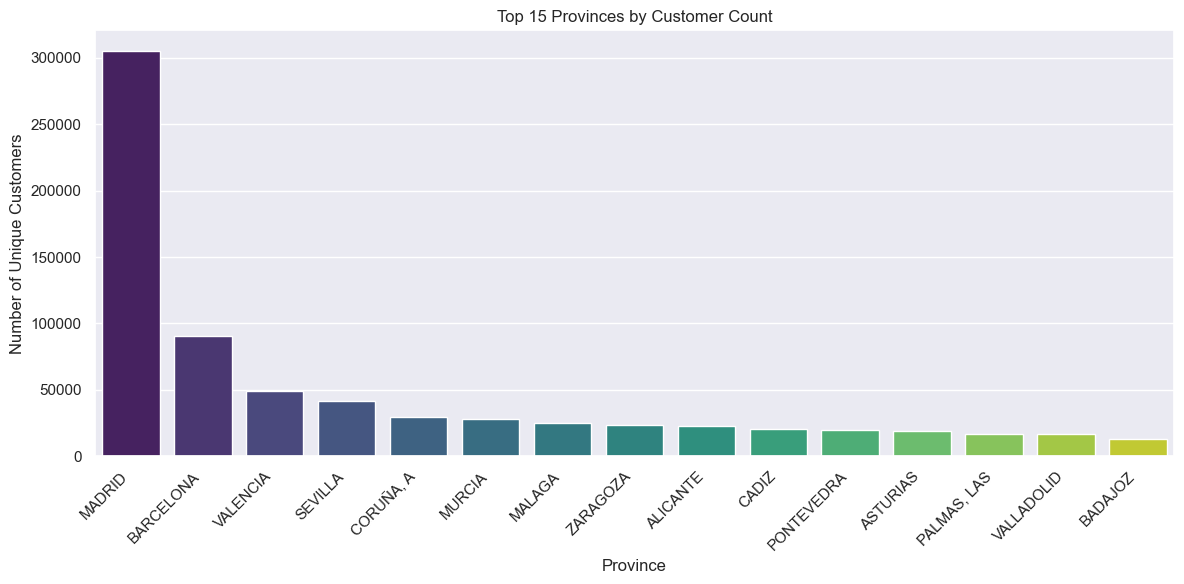

In [31]:
# Plot top 15 provinces
plt.figure(figsize=(12, 6))
sns.barplot(
    data=province_counts.head(15),
    x='nomprov',
    y='customer_count',
    palette='viridis'
)
plt.title('Top 15 Provinces by Customer Count')
plt.xlabel('Province')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Top 15 Provinces by Customer Count**

- **Madrid** has the highest number of customers by far, with over 300,000.

- **Barcelona** follows, but with a significantly smaller count (~90,000).

- Other provinces like Valencia, Sevilla, and A Coruña also contribute, but each has less than 50,000 customers.

- The customer base is highly concentrated in a few major urban areas.


In [5]:
product_to_plot =  [col for col in df_train.columns if col.endswith('ult1')]

In [8]:
len(product_to_plot)

24

In [11]:
# Create subplot grid (12 rows × 2 columns)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
rows, cols = 8, 3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{p}" for p in product_to_plot])

# Plot each product in a subplot
for idx, product in enumerate(product_to_plot):
    top_prov = df_train.groupby('nomprov')[product].sum().sort_values(ascending=False).head(10)

    row = (idx // cols) + 1
    col = (idx % cols) + 1

    fig.add_trace(
        go.Bar(x=top_prov.index, y=top_prov.values, name=product),
        row=row, col=col
    )

    fig.update_xaxes(tickangle=45, row=row, col=col)

# Update layout
fig.update_layout(
    height=1800,
    width=800,
    showlegend=False,
    title_text="Average Ownership Rate by Province (Top 10 per Product)",
    title_x=0.5
)

fig.show()

In [ ]:

product_cols = [col for col in df_train.columns if col.endswith('ult1')]

# Melt the DataFrame to long format
df_long = df_train.melt(id_vars='nomprov', value_vars=product_cols,
                        var_name='product', value_name='ownership')

# Filter only the owned products (value == 1)
df_owned = df_long[df_long['ownership'] == 1]

# Group by province and product to get total ownership
ownership_by_region = (
    df_owned
    .groupby(['nomprov', 'product'])
    .size()
    .reset_index(name='count')
)


# Plot treemap
fig = px.treemap(
    ownership_by_region,
    path=['nomprov', 'product'],
    values='count',
    title='Product Ownership by Province (Treemap)',
    color='count',
    color_continuous_scale='Viridis'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


**Product Ownership by Province**

- **Madrid** dominates product ownership, especially for the product `ind_cco_fin_ult1`.

- Other large rectangles like `ind_ctop_fin_ult1` and `ind_recibo_ult1` also appear within Madrid.

- **Barcelona**, **Valencia**, and **Coruña** also have significant product ownership but on a smaller scale.

- The largest space in each province is occupied by `ind_cco_fin_ult1`, showing it's the most commonly held product across all regions.
